In [1]:
import os                       # accessing directory structure
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns           # plotting

In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
from IPython.display import Image
%matplotlib inline

In [4]:
# Ler o arquivo sdss.csv
df = pd.read_csv('sdss.csv',skiprows=1)
print(df.head())

                 objid          ra        dec         u         g         r  \
0  1237666211927687614  266.621864  26.717041  18.74441  17.24021  16.67171   
1  1237667538011422731  159.771218  22.902207  18.18608  18.04931  17.75193   
2  1237667538012012625  161.184315  23.139441  19.26410  17.77944  17.10706   
3  1237665126940475445  204.405758  32.316683  18.39461  17.40648  16.99087   
4  1237667209982246991  158.594356  26.142638  18.15396  17.23699  16.91828   

          i         z   run  rerun  camcol  field             specobjid  \
0  16.48060  16.37055  4828    301       6    116   2457961876630300672   
1  17.73256  17.78253  5137    301       4    308   7235187389022623744   
2  16.82521  16.66497  5137    301       4    317   3660407331679739904   
3  16.61687  16.49783  4576    301       1    557   2374552923406362624   
4  16.76634  16.73904  5061    301       1    292  11779320818030630912   

    class  redshift  plate    mjd  fiberid  
0    STAR -0.000124   2183  5

In [5]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 500000 rows and 18 columns


In [6]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [7]:
# Store columns in a list, might will be helpful later
cols = list(df.columns)
cols

['objid',
 'ra',
 'dec',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run',
 'rerun',
 'camcol',
 'field',
 'specobjid',
 'class',
 'redshift',
 'plate',
 'mjd',
 'fiberid']

In [8]:
# Our labels
df['class'].unique()

array(['STAR', 'QSO', 'GALAXY'], dtype=object)

In [9]:
# Let's see how the classes are distributed 
df['class'].value_counts()

class
GALAXY    252460
STAR      193056
QSO        54484
Name: count, dtype: int64

<Axes: xlabel='class'>

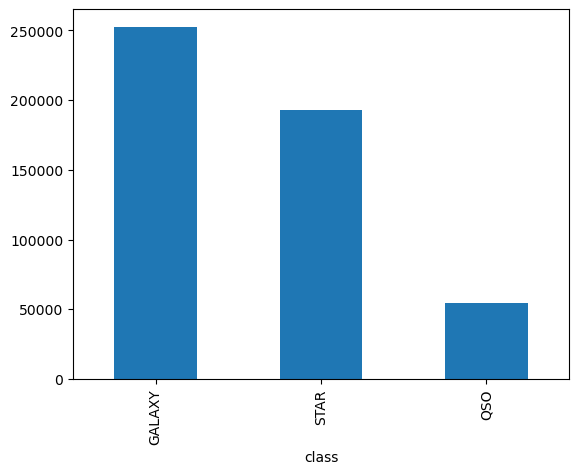

In [10]:
# Visualization with Matplotlib
df['class'].value_counts().plot(kind='bar')


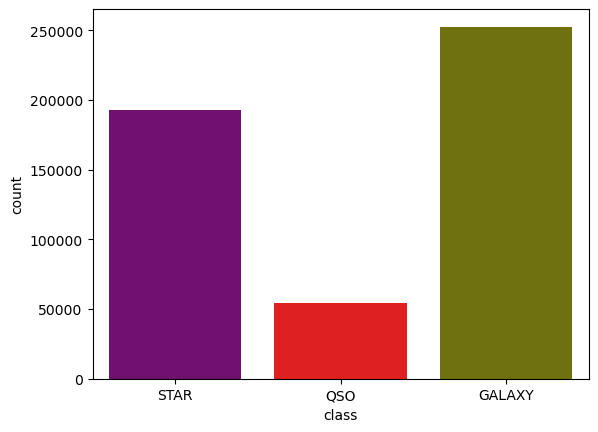

In [11]:
# Visualization with Seaborn
sns.countplot(x='class', data=df, palette="brg")
plt.show()

<Axes: >

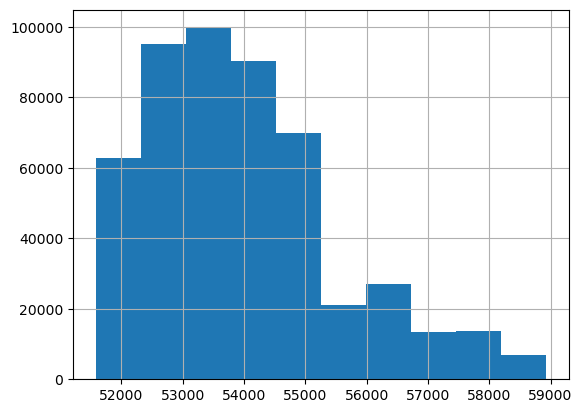

In [12]:


df['mjd'].hist()



<Axes: >

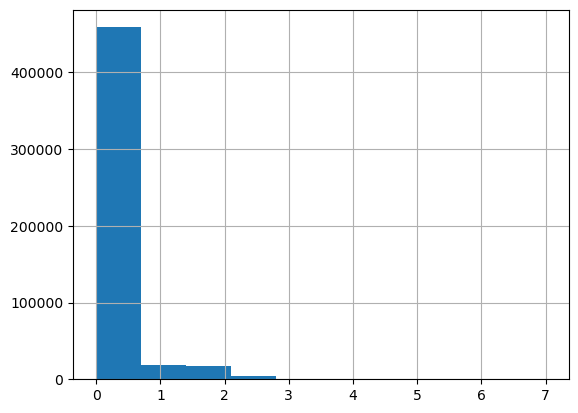

In [13]:


df['redshift'].hist()



In [14]:


# Let's find missing values
df.isnull().sum()



objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

### ENCODING

In [15]:


# Mapping classes to 0,1,2 values
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['class']))}
class_mapping



{'GALAXY': 0, 'QSO': 1, 'STAR': 2}

In [16]:
df['class'] = df['class'].map(class_mapping)
df

# now we see class column with numerical (0,1,2) values

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666211927687614,266.621864,26.717041,18.74441,17.24021,16.67171,16.48060,16.37055,4828,301,6,116,2457961876630300672,2,-0.000124,2183,53536,445
1,1237667538011422731,159.771218,22.902207,18.18608,18.04931,17.75193,17.73256,17.78253,5137,301,4,308,7235187389022623744,1,1.088803,6426,56334,562
2,1237667538012012625,161.184315,23.139441,19.26410,17.77944,17.10706,16.82521,16.66497,5137,301,4,317,3660407331679739904,2,-0.000198,3251,54882,388
3,1237665126940475445,204.405758,32.316683,18.39461,17.40648,16.99087,16.61687,16.49783,4576,301,1,557,2374552923406362624,0,0.081174,2109,53468,109
4,1237667209982246991,158.594356,26.142638,18.15396,17.23699,16.91828,16.76634,16.73904,5061,301,1,292,11779320818030630912,2,0.000418,10462,58158,567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1237671257437503649,56.510799,9.705400,19.40432,17.54797,16.72088,16.39897,16.21053,6003,301,4,70,3016357117092194304,2,-0.000166,2679,54368,259
499996,1237671257438224461,57.739462,10.915924,17.57432,16.32883,15.89939,15.72593,15.63555,6003,301,4,81,3016424462179395584,2,-0.000114,2679,54368,504
499997,1237671257441828880,64.009339,16.256775,18.51184,16.98609,16.08266,15.68706,15.46891,6003,301,4,136,3017544585841764352,2,0.000112,2680,54141,483
499998,1237661417135145112,198.885816,56.351522,19.18902,18.03292,17.36366,16.97176,16.70145,3712,301,3,140,1485093085154142208,0,0.118630,1319,52791,113


In [17]:
# Invariant back to original
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['class'] = df['class'].map(inv_class_mapping)
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666211927687614,266.621864,26.717041,18.74441,17.24021,16.67171,16.48060,16.37055,4828,301,6,116,2457961876630300672,STAR,-0.000124,2183,53536,445
1,1237667538011422731,159.771218,22.902207,18.18608,18.04931,17.75193,17.73256,17.78253,5137,301,4,308,7235187389022623744,QSO,1.088803,6426,56334,562
2,1237667538012012625,161.184315,23.139441,19.26410,17.77944,17.10706,16.82521,16.66497,5137,301,4,317,3660407331679739904,STAR,-0.000198,3251,54882,388
3,1237665126940475445,204.405758,32.316683,18.39461,17.40648,16.99087,16.61687,16.49783,4576,301,1,557,2374552923406362624,GALAXY,0.081174,2109,53468,109
4,1237667209982246991,158.594356,26.142638,18.15396,17.23699,16.91828,16.76634,16.73904,5061,301,1,292,11779320818030630912,STAR,0.000418,10462,58158,567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1237671257437503649,56.510799,9.705400,19.40432,17.54797,16.72088,16.39897,16.21053,6003,301,4,70,3016357117092194304,STAR,-0.000166,2679,54368,259
499996,1237671257438224461,57.739462,10.915924,17.57432,16.32883,15.89939,15.72593,15.63555,6003,301,4,81,3016424462179395584,STAR,-0.000114,2679,54368,504
499997,1237671257441828880,64.009339,16.256775,18.51184,16.98609,16.08266,15.68706,15.46891,6003,301,4,136,3017544585841764352,STAR,0.000112,2680,54141,483
499998,1237661417135145112,198.885816,56.351522,19.18902,18.03292,17.36366,16.97176,16.70145,3712,301,3,140,1485093085154142208,GALAXY,0.118630,1319,52791,113


In [18]:


# Labels encoding with special Scikit Learn function
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['class'].values)
print(y)
print('We have {} values'.format(len(y)))



[2 1 2 ... 2 0 0]
We have 500000 values


In [19]:


# Our target
print(y)

# We prepare data on which we will train and test
# Labels column should be excluded
df = df.drop(columns=['class'])
df



[2 1 2 ... 2 0 0]


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1237666211927687614,266.621864,26.717041,18.74441,17.24021,16.67171,16.48060,16.37055,4828,301,6,116,2457961876630300672,-0.000124,2183,53536,445
1,1237667538011422731,159.771218,22.902207,18.18608,18.04931,17.75193,17.73256,17.78253,5137,301,4,308,7235187389022623744,1.088803,6426,56334,562
2,1237667538012012625,161.184315,23.139441,19.26410,17.77944,17.10706,16.82521,16.66497,5137,301,4,317,3660407331679739904,-0.000198,3251,54882,388
3,1237665126940475445,204.405758,32.316683,18.39461,17.40648,16.99087,16.61687,16.49783,4576,301,1,557,2374552923406362624,0.081174,2109,53468,109
4,1237667209982246991,158.594356,26.142638,18.15396,17.23699,16.91828,16.76634,16.73904,5061,301,1,292,11779320818030630912,0.000418,10462,58158,567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1237671257437503649,56.510799,9.705400,19.40432,17.54797,16.72088,16.39897,16.21053,6003,301,4,70,3016357117092194304,-0.000166,2679,54368,259
499996,1237671257438224461,57.739462,10.915924,17.57432,16.32883,15.89939,15.72593,15.63555,6003,301,4,81,3016424462179395584,-0.000114,2679,54368,504
499997,1237671257441828880,64.009339,16.256775,18.51184,16.98609,16.08266,15.68706,15.46891,6003,301,4,136,3017544585841764352,0.000112,2680,54141,483
499998,1237661417135145112,198.885816,56.351522,19.18902,18.03292,17.36366,16.97176,16.70145,3712,301,3,140,1485093085154142208,0.118630,1319,52791,113


In [20]:
# We need to normalize the data, to not have bias of huge values

from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


### SPLIT

In [21]:


X = df



In [22]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)



In [23]:


X_train



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
297504,0.687361,0.938869,0.250402,0.822250,0.707661,0.312835,0.998397,0.998622,0.687407,0.0,0.4,0.207071,0.901719,0.001403,0.901718,0.932146,0.908909
238029,0.438367,0.358420,0.270434,0.888813,0.715380,0.303190,0.998355,0.998558,0.438399,0.0,0.6,0.073737,0.121572,0.008997,0.121570,0.204379,0.234234
336929,0.266841,0.509240,0.240477,0.993615,0.839125,0.368232,0.998529,0.998755,0.266857,0.0,0.8,0.140404,0.243137,0.001440,0.243140,0.450775,0.105105
117602,0.194797,0.990348,0.091233,0.990380,0.846643,0.367292,0.998510,0.998718,0.194844,0.0,0.4,0.159596,0.031108,0.009373,0.031105,0.133397,0.179179
207386,0.531312,0.505911,0.330315,0.859871,0.670327,0.276706,0.998282,0.998480,0.531358,0.0,0.4,0.065657,0.122064,0.012479,0.122058,0.256731,0.399399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,0.266919,0.685411,0.612826,0.944303,0.793442,0.340140,0.998443,0.998650,0.266981,0.0,0.2,0.114141,0.029318,0.016615,0.029314,0.065135,0.257257
267336,0.361986,0.413674,0.241937,0.966031,0.817489,0.354911,0.998486,0.998695,0.362048,0.0,0.2,0.223232,0.059278,0.014450,0.059279,0.155970,0.031031
470924,0.276618,0.678934,0.612655,0.794419,0.700891,0.316785,0.998416,0.998650,0.276648,0.0,0.6,0.311111,0.469752,0.001331,0.469750,0.611640,0.547548
491755,0.153291,0.363463,0.681301,0.903360,0.759666,0.327175,0.998410,0.998618,0.153322,0.0,0.6,0.175758,0.014586,0.014427,0.014575,0.040114,0.564565


## MODELS

### Decision Trees

In [24]:


from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state=49)

model_dtc.fit(X_train, y_train)

accuracies = {}

acc = model_dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))



Decision Tree Test Accuracy 98.71%


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression() # default parameters

model_lr.fit(X_train,y_train)

y_pred = model_lr.predict(X_test)

acc = model_lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 90.68%


/Users/diogomartins/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print(y_pred)
print(y_test)

[2 2 0 ... 0 2 0]
[2 0 0 ... 2 2 0]


In [27]:


from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = model_lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = model_lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)



Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     50564
           1       0.96      0.92      0.94     10828
           2       0.89      0.89      0.89     38608

    accuracy                           0.91    100000
   macro avg       0.92      0.91      0.91    100000
weighted avg       0.91      0.91      0.91    100000

Confusion Matrix: 
 [[46365   147  4052]
 [  883  9914    31]
 [ 3984   223 34401]]
Training Score:  0.9049575
Testing Score:  0.9068


### Support Vector Machines (SVM)

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Ajustando o modelo SVM com kernel linear ou RBF (dependendo da complexidade dos dados)
model_svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=1)

# Treinando o modelo
model_svm.fit(X_train, y_train)

# Avaliando no conjunto de teste
y_pred = model_svm.predict(X_test)

# Calculando acurácia
acc = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

# Relatório de classificação
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusão
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy of SVM Algorithm: 96.44%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     50564
           1       0.99      0.94      0.96     10828
           2       0.96      0.97      0.96     38608

    accuracy                           0.96    100000
   macro avg       0.97      0.96      0.96    100000
weighted avg       0.96      0.96      0.96    100000


Confusion Matrix:
 [[48834   148  1582]
 [  656 10143    29]
 [ 1144     1 37463]]


### Naive Bayes

In [29]:


from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

model_nb.fit(X_train, y_train)

acc = model_nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))



Accuracy of Naive Bayes: 95.31%


In [30]:
y_pred = model_nb.predict(X_test)

In [31]:
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = model_lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = model_lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     50564
           1       0.74      0.95      0.83     10828
           2       0.99      0.97      0.98     38608

    accuracy                           0.95    100000
   macro avg       0.90      0.95      0.92    100000
weighted avg       0.96      0.95      0.96    100000

Confusion Matrix: 
 [[47533  2666   365]
 [  570 10253     5]
 [   89   994 37525]]
Training Score:  0.9049575
Testing Score:  0.9068


### KNN Neighbours

In [32]:


from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
model_knn.fit(X_train, y_train)
prediction = model_knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(3, model_knn.score(X_test, y_test)*100))



3 NN Score: 88.12%


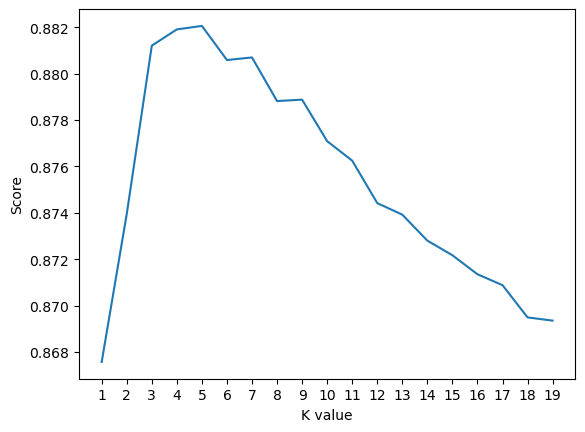

Maximum KNN Score is 88.21%


In [33]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))